# Digit classification using machine learning

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [9]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Load the MNIST dataset

In [10]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]

# Visualize (and play with) the MNIST dataset

In [11]:
#displays the array size of data .70000 images and 784 features. 28*28 pixels per image. 0-255 pixel intensity 0=white 255=black
X.shape
#OUTPUT: (70000, 784)

(70000, 784)

In [12]:
#displays array size of target. target has labels
y.shape
#OUTPUT: (70000,)

(70000,)

Saving figure some_digit_plot


FileNotFoundError: [Errno 2] No such file or directory: '.\\images\\classification\\some_digit_plot.png'

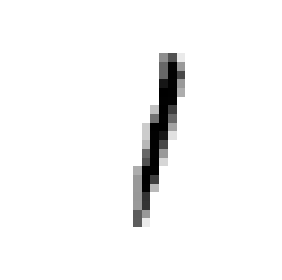

In [13]:
#select and display some digit from the dataset
import matplotlib
import matplotlib.pyplot as plt

#taking an images feature vector and reshaping it to a 28*28 pixel image 7201
some_digit_index = 7201
some_digit = X[some_digit_index]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [14]:
#print some digit's label
print('The ground truth label for the digit above is: ',y[some_digit_index])
#OUTPUT: The ground truth label for the digit above is:  1.0

The ground truth label for the digit above is:  1.0


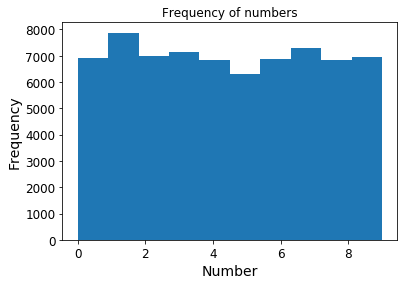

In [15]:
import matplotlib.pyplot as plt

#plots a histograph of frequency for each number in the dataset
plt.hist(y)
plt.title("Frequency of numbers")
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.show()

# Split the dataset

In [16]:
#Split dataset
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [17]:
#random shuffle
import numpy as np

#shuffling to make sure the cross-validation folds are similar
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Classification using "Built-in classifier 1" and default parameters 

In [18]:
from sklearn.linear_model import SGDClassifier

#build and fit linear model
#using the Stochastic Gradient Descent Classifier (can handel large datasets efficiently)
#SGD:Linear model that assigns weight per class to each pixel. It sums up the pixel intensities to get a score for each class
#training instances are dealt with one at a time in SGD
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

C:\Users\Mine\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [19]:
#test model by making a prediction on some_digit
sgd_clf.predict([some_digit])
#OUTPUT: array([ 1.])

array([ 1.])

In [20]:
#inspect decision function
#returns a score for each instance
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores
#OUTPUT: array([[-660561.16495471,  169164.71870837, -144815.5052832 ,
#         -69500.1526722 , -172916.94934103, -248951.73204392,
#        -280541.23990047,  -72041.70140166, -173346.54197882,
#           2718.11617764]])

array([[-660561.16495471,  169164.71870837, -144815.5052832 ,
         -69500.1526722 , -172916.94934103, -248951.73204392,
        -280541.23990047,  -72041.70140166, -173346.54197882,
           2718.11617764]])

In [21]:
#select (the index of the) max value among scores
np.argmax(some_digit_scores)
#OUTPUT: 1

1

In [13]:
from sklearn.model_selection import cross_val_score

#Splits the training set into 3 folds to make predictions and evalute them 
#     on each fold using a model trained on the remaining folds
#outputs the accuracy of all cross-validation folds
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")
#OUTPUT: array([ 0.84063187,  0.84899245,  0.86652998])

array([ 0.84063187,  0.84899245,  0.86652998])

In [22]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

#3 fold cross-validation that returns the predictions made on each test fold
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

C:\Users\Mine\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Mine\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Mine\Anaconda3\lib\site-p

array([[5604,    2,   81,   25,    8,   44,   32,    9,  115,    3],
       [   1, 6292,   72,   54,   20,   22,    8,    8,  262,    3],
       [  59,   73, 5016,  218,   68,   25,   82,   58,  344,   15],
       [  40,   16,  148, 5315,   19,  199,   23,   41,  297,   33],
       [  24,   26,  145,   39, 4746,   22,   63,   49,  502,  226],
       [  73,   25,   74,  375,   62, 3868,   91,   22,  771,   60],
       [  50,   19,  128,   13,   84,  105, 5369,    8,  140,    2],
       [  65,   19,   69,  117,  100,   18,    2, 5641,  112,  122],
       [  47,   96,  127,  196,   77,  135,   30,   23, 5088,   32],
       [  58,   45,   59,  199,  233,   59,    2,  385,  725, 4184]], dtype=int64)

In [15]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Saving figure confusion_matrix_plot


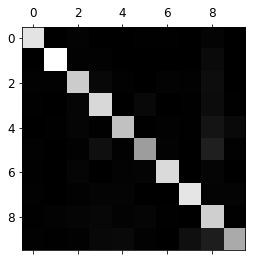

In [16]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

In [17]:
#focusing the plot on errors
row_sums = conf_mx.sum(axis=1, keepdims=True)

#dividing each value in the confusion matrix by the number of images in corresponding classes
norm_conf_mx = conf_mx / row_sums

Saving figure confusion_matrix_errors_plot


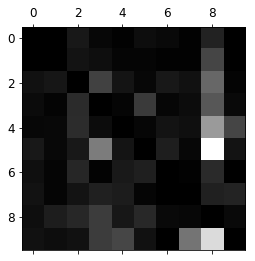

In [18]:
#filling the diagonal with zeros to keep only the errors
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

In [19]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

Saving figure error_analysis_digits_plot


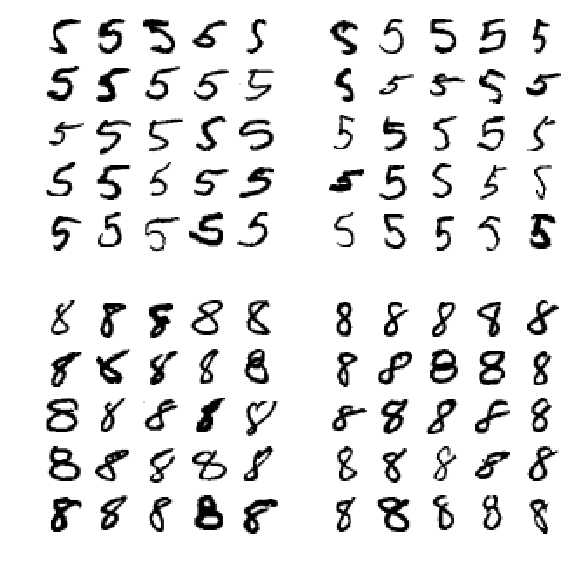

In [20]:
#ploting examples of 5s and 8s to see what the classifier is doing and why it's failing
cl_a, cl_b = 5, 8
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

In [21]:
#Evaluate accuracy on test set
from sklearn.metrics import accuracy_score
y_pred = sgd_clf.predict(X_test)
accuracy_score(y_test, y_pred)
#OUTPUT: 0.86129999999999995

0.86129999999999995

# Classification using "Built-in classifier 2" and default parameters 

In [22]:
from sklearn.ensemble import RandomForestClassifier

#using the Random Forest Classifier
forest_clf = RandomForestClassifier(random_state=42)

#training the classifier
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

#OUTPUT: array([ 1.])

array([ 1.])

In [23]:
#outputs the percentage of how confident the classifier is on it's prediction for each number.
forest_clf.predict_proba([some_digit])
#OUTPUT: array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [38]:
#Splits the training set into 3 folds to make predictions and evalute them 
#     on each fold using a model trained on the remaining folds
#outputs the accuracy of all cross-validation folds
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")
#OUPUT: array([ 0.94041192,  0.93879694,  0.93949092])

array([ 0.94041192,  0.93879694,  0.93949092])

In [39]:
#3 fold cross-validation that returns the predictions made on each test fold
y_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5804,    1,   11,    9,    8,   14,   32,    3,   38,    3],
       [   1, 6616,   39,   23,   13,    6,    9,   19,   10,    6],
       [  48,   31, 5633,   50,   49,   16,   27,   41,   54,    9],
       [  20,   17,  137, 5645,   16,  124,    7,   45,   88,   32],
       [  18,   17,   33,   11, 5526,    4,   35,   19,   26,  153],
       [  52,   21,   27,  202,   39, 4938,   43,    6,   62,   31],
       [  56,   17,   21,    9,   27,   66, 5695,    0,   23,    4],
       [  12,   38,   96,   26,   69,   10,    1, 5912,   15,   86],
       [  28,   60,   99,  153,   59,   98,   33,   15, 5229,   77],
       [  33,   18,   24,   98,  164,   44,   10,  114,   68, 5376]])

Saving figure confusion_matrix_plot


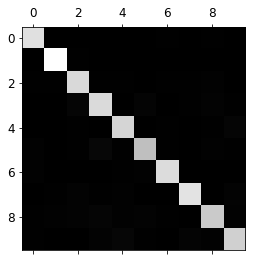

In [40]:
#outputs an image representation of a confusion matrix. A diagonal would mean a decent result
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

In [41]:
#focusing the plot on errors
row_sums = conf_mx.sum(axis=1, keepdims=True)

#dividing each value in the confusion matrix by the number of images in corresponding classes
norm_conf_mx = conf_mx / row_sums

Saving figure confusion_matrix_errors_plot


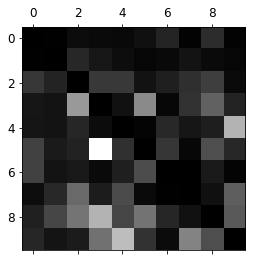

In [42]:
#filling the diagonal with zeros to keep only the errors
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

Saving figure error_analysis_digits_plot


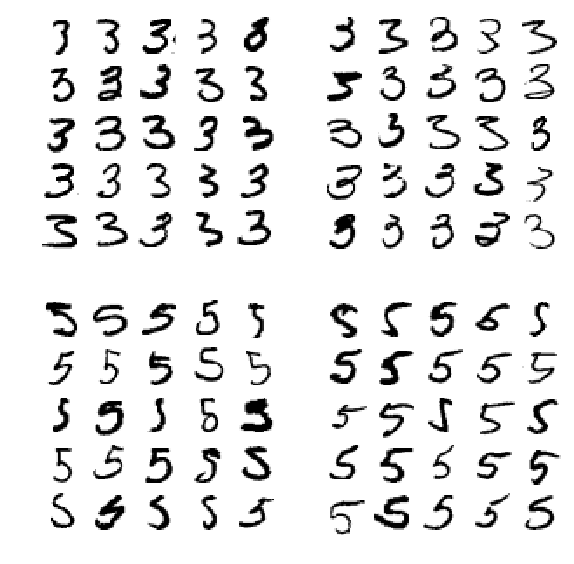

In [43]:
#ploting examples of 3s and 5s to see what the classifier is doing and why it's failing
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

In [44]:
#Evaluate accuracy on test set
y_pred = forest_clf.predict(X_test)
accuracy_score(y_test, y_pred)
#OUTPUT: 0.94720000000000004

0.94720000000000004

# Investigating the impact of data normalization / standardization

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

#scaling the inputs increases accuracy
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(forest_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")
#OUPUT: array([ 0.94041192,  0.93894695,  0.93929089])

array([ 0.94041192,  0.93894695,  0.93929089])

In [46]:
#3 fold cross-validation that returns the predictions made on each test fold
y_train_pred = cross_val_predict(forest_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5804,    1,   11,    9,    8,   14,   32,    3,   38,    3],
       [   1, 6616,   39,   23,   13,    6,    9,   19,   10,    6],
       [  49,   31, 5635,   49,   48,   16,   27,   41,   54,    8],
       [  20,   17,  136, 5645,   16,  123,    7,   45,   90,   32],
       [  18,   17,   33,   11, 5526,    4,   35,   19,   26,  153],
       [  52,   21,   27,  201,   40, 4939,   43,    6,   62,   30],
       [  56,   17,   21,    9,   27,   68, 5692,    0,   24,    4],
       [  12,   38,   97,   26,   69,    9,    1, 5912,   15,   86],
       [  29,   60,   98,  153,   57,   99,   33,   15, 5230,   77],
       [  34,   18,   24,   98,  164,   44,   10,  115,   68, 5374]])

Saving figure confusion_matrix_plot


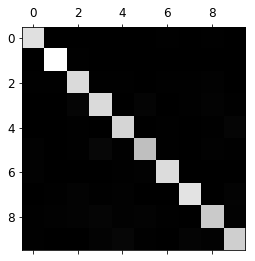

In [47]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

In [48]:
#focusing the plot on errors
row_sums = conf_mx.sum(axis=1, keepdims=True)

#dividing each value in the confusion matrix by the number of images in corresponding classes
norm_conf_mx = conf_mx / row_sums

Saving figure confusion_matrix_errors_plot


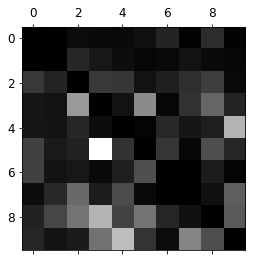

In [49]:
#filling the diagonal with zeros to keep only the errors
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

Saving figure error_analysis_digits_plot


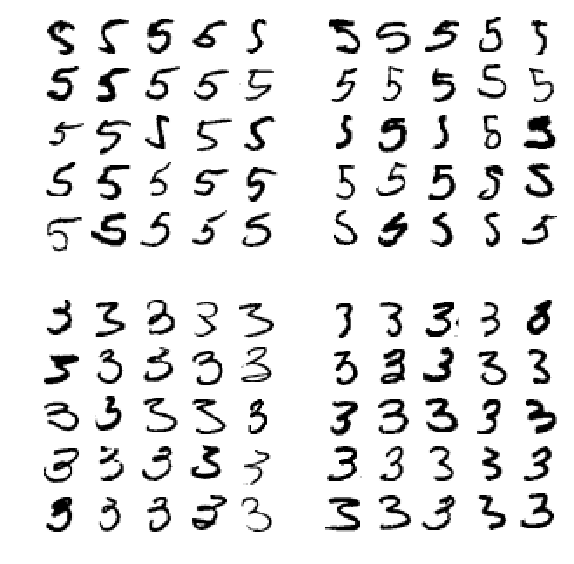

In [50]:
#ploting examples of 5s and 8s to see what the classifier is doing and why it's failing
cl_a, cl_b = 5, 3
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

In [51]:
#Evaluate accuracy on test set
#It doesn't make sense to scale the test set
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))
y_pred = forest_clf.predict(X_test_scaled)
accuracy_score(y_test, y_pred)
#OUTPUT: 0.29830000000000001

0.29830000000000001

In [52]:
#Evaluate accuracy on test set
y_pred = forest_clf.predict(X_test)
accuracy_score(y_test, y_pred)
#OUTPUT: 0.94720000000000004

0.94720000000000004

# Build, train, and evaluate a third classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#Classifier that implements the k-nearest neighbor vote for the class of the target point
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_clf.predict([some_digit])
#OUTPUT: array([ 1.])

In [ ]:
#predicts the probablilites
knn_clf.predict_proba([some_digit])
#OUTPUT:array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [ ]:
from sklearn.model_selection import cross_val_score

#Splits the training set into 3 folds to make predictions and evalute them 
#     on each fold using a model trained on the remaining folds
#outputs the accuracy of all cross-validation folds
cross_val_score(knn_clf, X_train, y_train, cv=3, scoring ="accuracy")
#OUTPUT:array([ 0.96790642,  0.96924846,  0.96879532])

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

#3 fold cross-validation that returns the predictions made on each test fold
y_train_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

In [ ]:
#focusing the plot on errors
row_sums = conf_mx.sum(axis=1, keepdims=True)

#dividing each value in the confusion matrix by the number of images in corresponding classes
norm_conf_mx = conf_mx / row_sums

In [ ]:
#filling the diagonal with zeros to keep only the errors
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

In [ ]:
#Evaluate accuracy on test set
from sklearn.metrics import accuracy_score
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)
#OUTPUT: 0.96879999999999999

# Performing hyperparameter optimization (if applicable)

In [ ]:
#Exhaustive search over specified parameter values for an estimator
''' Took over 2 days and wansn't able to get a result maybe I'm doing something wrong with parameters
from sklearn.model_selection import GridSearchCV
param_grid=[{'n_neighbors':[5,10,15], 'weights':["uniform"]},
            {'n_neighbors':[5,10,15], 'weights':["distance"]}
]
grid_search=GridSearchCV(knn_clf, param_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)
'''

In [ ]:
#returns the best paramters
#grid_search.best_params_

In [ ]:
#returns the estimator that gave the highest score
#grid_search.best_estimator_

In [ ]:
#performs a randomized search on the hyper parameters. This doesn't go through all the possiblilites like GridSearchCV
'''
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist={ "n_neighbors": [3,5,7,9,15],
            "weights":["uniform","distance"],
            "leaf_size":[10,20,30]
}

n_iter_search=10
random_search=RandomizedSearchCV(knn_clf, param_distributions=param_dist, n_iter=n_iter_search)
random_search.fit(X_train, y_train)
'''

In [ ]:
#returns the best parameters
#random_search.best_params_

In [ ]:
#returns the estimator that gave the highest score
#random_search.best_estimator_

In [ ]:
#manually trying to find the best parameters because GridSearchCV and RandomizedSearchCV took more then 2 days on my computer
#and I still wasn't able to get a result.
from sklearn.neighbors import KNeighborsClassifier
knn_clf1=KNeighborsClassifier(n_neighbors=3, leaf_size=20)
knn_clf2=KNeighborsClassifier(n_neighbors=7, leaf_size=30)
knn_clf3=KNeighborsClassifier(n_neighbors=15, leaf_size=20)

knn_clf1.fit(X_train, y_train)
knn_clf2.fit(X_train, y_train)
knn_clf3.fit(X_train, y_train)

In [ ]:
#Evaluate accuracy on test set
from sklearn.metrics import accuracy_score
y_pred = knn_clf1.predict(X_test)
accuracy_score(y_test, y_pred)
#OUTPUT: 0.97050000000000003

In [ ]:
#Evaluate accuracy on test set
from sklearn.metrics import accuracy_score
y_pred = knn_clf2.predict(X_test)
accuracy_score(y_test, y_pred)
#OUTPUT: 0.96940000000000004

In [ ]:
#Evaluate accuracy on test set
from sklearn.metrics import accuracy_score
y_pred = knn_clf3.predict(X_test)
accuracy_score(y_test, y_pred)
#OUTPUT: 0.96330000000000005

In [ ]:
#Evaluate accuracy on test set
from sklearn.neighbors import KNeighborsClassifier
knn_clf4=KNeighborsClassifier(n_neighbors=3, leaf_size=20, weights="distance")
knn_clf4.fit(X_train, y_train)

In [ ]:
#Evaluate accuracy on test set
from sklearn.metrics import accuracy_score
y_pred = knn_clf4.predict(X_test)
accuracy_score(y_test, y_pred)
#OUTPUT: 0.97170000000000001

# Best solution

In [15]:
from sklearn.neighbors import KNeighborsClassifier

#Classifier that implements the k-nearest neighbor vote for the class of the target point
#The 3 nearest neighbors vote for the class of the target point
#The leaf_size is the size of the leaf passed to the tree
#Weight is the weight function used in the prediction. In this case it was distance, which means weight points are by the
#     inverse of the distance (closer neighbors)
knn_clf4=KNeighborsClassifier(n_neighbors=3, leaf_size=20, weights="distance")
knn_clf4.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')

In [13]:
from sklearn.model_selection import cross_val_score

#Splits the training set into 3 folds to make predictions and evalute them 
#     on each fold using a model trained on the remaining folds
#outputs the accuracy of all cross-validation folds
cross_val_score(knn_clf4, X_train, y_train, cv=3, scoring="accuracy")
#OUTPUT: array([ 0.96945611,  0.97239862,  0.97174576])

array([ 0.96945611,  0.97239862,  0.97174576])

In [14]:
#Evaluate accuracy on test set
from sklearn.metrics import accuracy_score
y_pred = knn_clf4.predict(X_test)
accuracy_score(y_test, y_pred)
#OUTPUT: 0.97170000000000001

0.97170000000000001